#  Sinusoids  - Time and Spectrum  
This program is an introductory program to DSP

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot  as plt
import scipy as sp
import scipy.signal as signal
from scipy.fftpack import fft, ifft, fftfreq
from random import randint

### Sampling Rate Effects

The graphs produced are the the exact same signal with different sampling rates. The signal with 10x the Nyquist Rate is a noticably cleaner sin wave while the signal that only has a sampling rate of 4x the Nyquist Rate only contains the peaks, the zero-padded points, and the x-intercepts.

<StemContainer object of 3 artists>

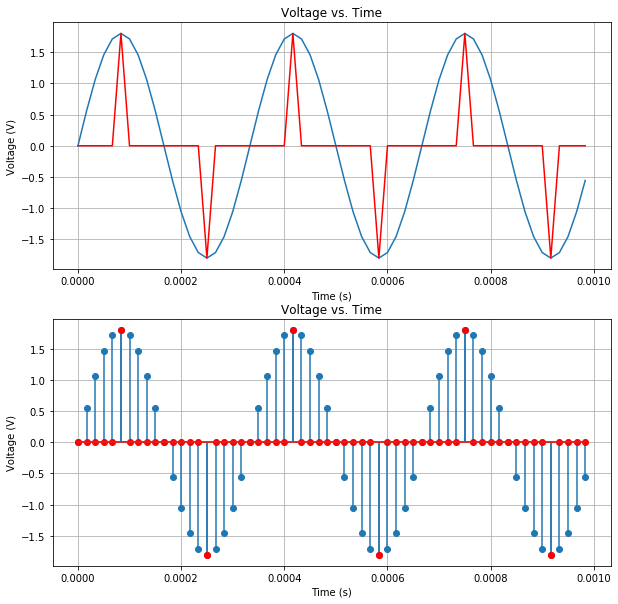

In [2]:
duration =  1e-3 # Duration of the sample
Fs = 20*3000    # Sampling frequency

# Signal
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s1 = amp*np.sin(2*np.pi*freq*t + theta)

# Signal at triple the sampling rate
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
Fs_slow = Fs/5    # 5x less the sampling rate
t2  = np.arange(0,duration, 1/Fs_slow) # X axis: Time & Samples
s2 = amp*np.sin(2*np.pi*freq*t2 + theta)
zero_array = np.zeros(len(s2))  
zero_and_sig = np.vstack([s2, zero_array, zero_array, zero_array, zero_array])
s2 = zero_and_sig.flatten(order='F')

# Waveform display
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s1, label='s1')
ax[0].plot(t,s2, label='s2', color = 'red')

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s1, use_line_collection=True)
ax[1].stem(t,s2, use_line_collection=True, markerfmt='ro')

### Frequency Domain
The magnitude and phase of the signal is represented in the plots below. 

<StemContainer object of 3 artists>

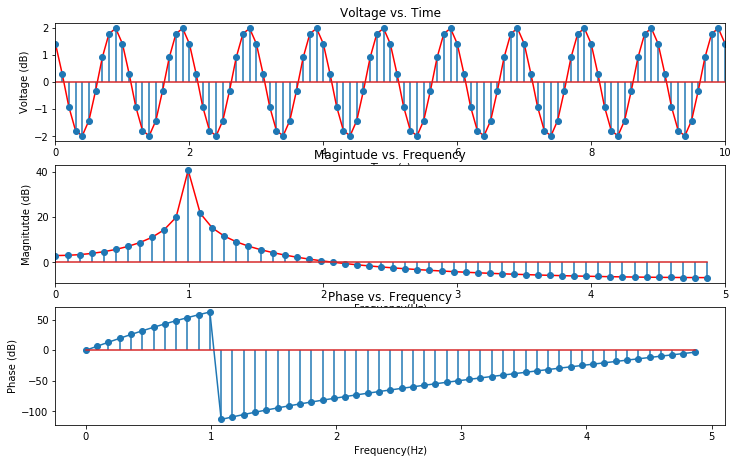

In [3]:
# Signal
duration = 11.01 # Duration offset from an integer to make the FFT look appropriate
freq  = 1
Fs = 10*freq
amp   = 2
phase = 135*np.pi/180 # degrees converted to radians
t  = np.arange(0,duration, 1/Fs)
s_total = amp*np.sin(2*np.pi*freq*t + phase)


# FFT Setup
nfft = len(s_total) # Num of bins
S = fft(s_total, nfft)
phase = np.angle(S, deg = True)
fft_freq = fftfreq(nfft, 1/Fs)
SdB = 20*np.log10(abs(S))
           

# Displaying the plots
plt.figure(figsize=[12,10])


# Signal plot
plt.subplot(4,1,1)
plt.xlim(0,10)
plt.title('Voltage vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (dB)')
plt.plot(t, s_total,'r')
plt.stem(t,s_total,use_line_collection=True)


# magnitude plot
plt.subplot(4,1,2)
plt.xlim(0,5*freq)
plt.plot(fft_freq[0:nfft//2], SdB[0:nfft//2], 'r')
plt.stem(fft_freq[0:nfft//2], SdB[0:nfft//2], use_line_collection=True)
plt.title('Magintude vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitutde (dB)')


# phase plot
plt.subplot(4,1,3)
plt.title('Phase vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase (dB)')
plt.plot(fft_freq[0:nfft//2], phase[0:nfft//2])
plt.stem(fft_freq[0:nfft//2], phase[0:nfft//2], use_line_collection=True)

### FFT of a Zero Padded Signal
The more zeros added, the more narrow the longer the lobes get.

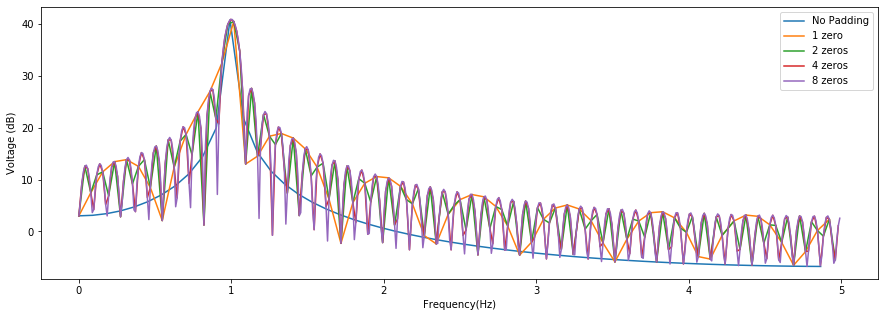

In [4]:
nfft_z1 = int(1*2**(np.ceil(np.log2(len(s_total)))))
nfft_z2 = int(2*2**(np.ceil(np.log2(len(s_total)))))
nfft_z4 = int(4*2**(np.ceil(np.log2(len(s_total)))))
nfft_z8 = int(8*2**(np.ceil(np.log2(len(s_total)))))


S_z1 = fft(s_total, nfft_z1)
S_z2 = fft(s_total, nfft_z2)
S_z4 = fft(s_total, nfft_z4)
S_z8 = fft(s_total, nfft_z8)


fft_freq_z1 = fftfreq(nfft_z1, 1/Fs)
fft_freq_z2 = fftfreq(nfft_z2, 1/Fs)
fft_freq_z4 = fftfreq(nfft_z4, 1/Fs)
fft_freq_z8 = fftfreq(nfft_z8, 1/Fs)

plt.figure(figsize=(15,5))
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(S[0:nfft//2])), label="No Padding")
plt.plot(fft_freq_z1[0:nfft_z1//2], 20*np.log10(abs(S_z1[0:nfft_z1//2])), label="1 zero")
plt.plot(fft_freq_z2[0:nfft_z2//2], 20*np.log10(abs(S_z2[0:nfft_z2//2])), label="2 zeros")
plt.plot(fft_freq_z4[0:nfft_z4//2], 20*np.log10(abs(S_z4[0:nfft_z4//2])), label="4 zeros")
plt.plot(fft_freq_z8[0:nfft_z8//2], 20*np.log10(abs(S_z8[0:nfft_z8//2])), label="8 zeros")

plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()

### Signal Combination
Initializes two signals, adds them, and displays the result using line and stem plots.

_Notes_  
- Adding two signals at the same frequency and amplitduted with different phases introduces a phase and amplitude shift in the result. My intuition failed me thinking that I would be able to see two signals.

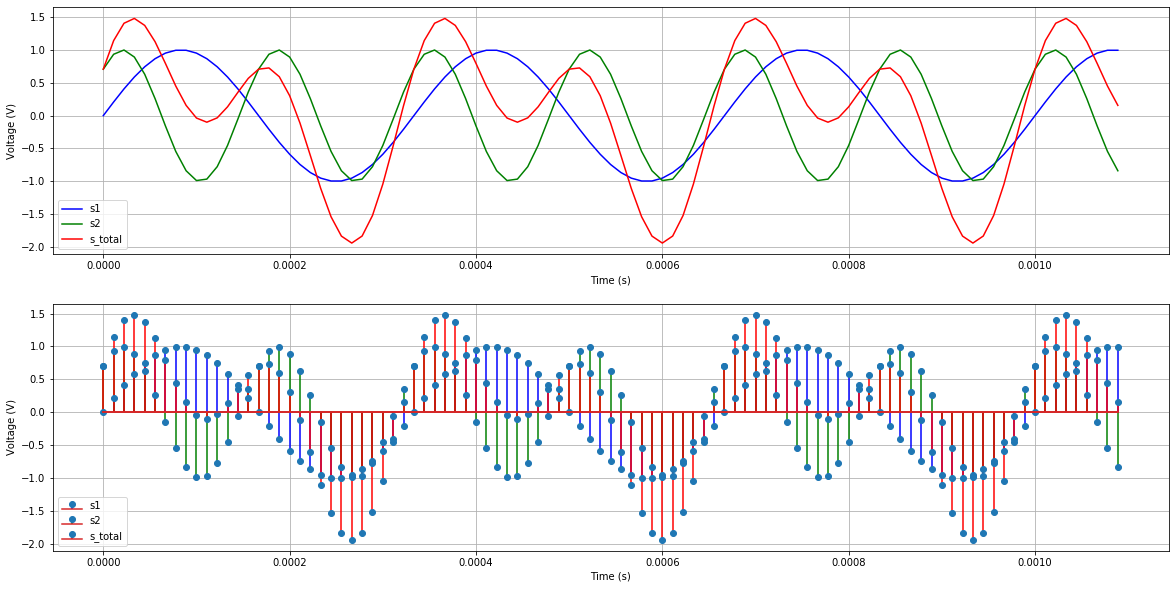

In [5]:
# Sampling Windows Setup
duration =  1.1e-3               # Sample range
Fs = 15*6000                     # Sampling frequency
t  = np.arange(0,duration, 1/Fs) # Total samples

# 1st Signal
freq1  = 3000 
amp1   = 1
phase1 = 0 * np.pi/180 # degrees converted to radians
s1 = amp1*np.sin(2*np.pi*freq1*t + phase1)

# 2nd  Signal
freq2  = 6000 
amp2   = 1  
phase2 = 45 * np.pi/180 
s2 = amp2*np.sin(2*np.pi*freq2*t + phase2)

#Combination of two signals
s_total = s1  + s2

# Waveform display
plt.figure('position', [20,10])
plt.subplot(2,1,1)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)' )
plt.grid()
plt.plot(t, s1, 'b', label="s1")
plt.plot(t, s2, 'g', label="s2")
plt.plot(t,s_total, 'r', label="s_total")
plt.legend()

#Stem plot
plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)' )
plt.grid()
plt.stem(t,s1, 'b', use_line_collection=True, label="s1", )
plt.stem(t,s2, 'g', use_line_collection=True, label="s2")
plt.stem(t,s_total, 'r', use_line_collection=True, label="s_total")
plt.legend()

### FFT of Combined Signals

(99,)


<StemContainer object of 3 artists>

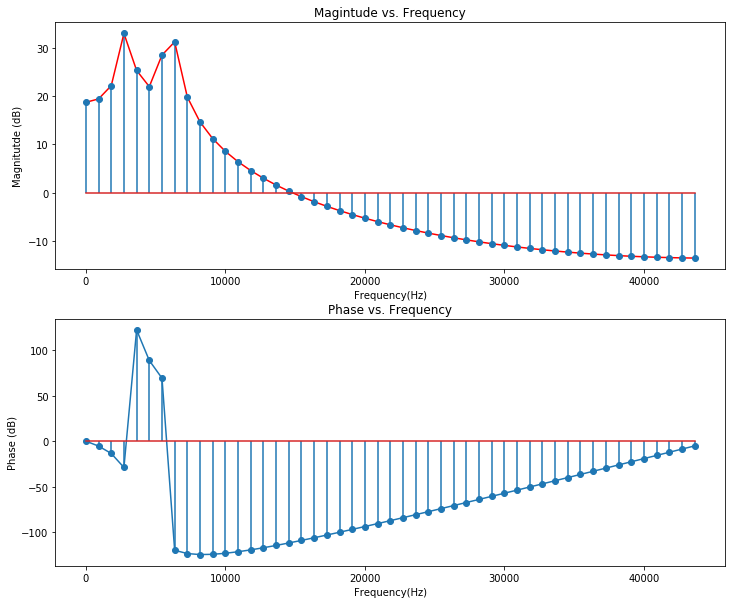

In [6]:
nfft = len(s_total) # Num of bins
print(np.shape(s_total))
S = fft(s_total, nfft)
phase = np.angle(S, deg = True)
fft_freq = fftfreq(nfft, 1/Fs)
SdB = 20*np.log10(abs(S))
           

# Displaying the plots
plt.figure(figsize=[12,10])


# magnitude plot
plt.subplot(2,1,1)
# plt.xlim(1000,10000)
plt.plot(fft_freq[0:nfft//2], SdB[0:nfft//2], 'r')
plt.stem(fft_freq[0:nfft//2], SdB[0:nfft//2], use_line_collection=True)
plt.title('Magintude vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitutde (dB)')


# phase plot
plt.subplot(2,1,2)
plt.title('Phase vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase (dB)')
plt.plot(fft_freq[0:nfft//2], phase[0:nfft//2])
plt.stem(fft_freq[0:nfft//2], phase[0:nfft//2], use_line_collection=True)

### Varying Zero Padding for Combined Signals

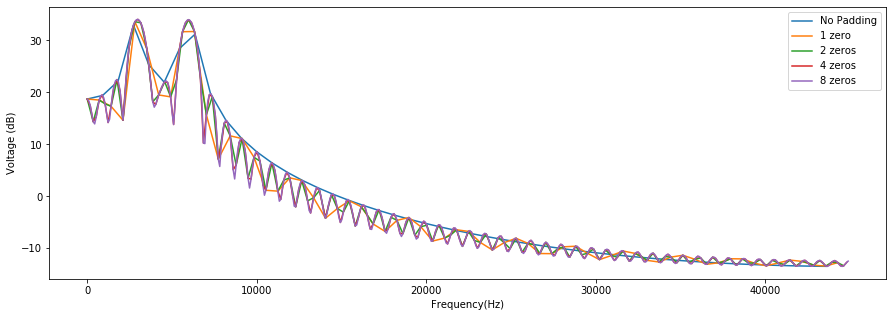

In [7]:
nfft_z1 = int(1*2**(np.ceil(np.log2(len(s_total)))))
nfft_z2 = int(2*2**(np.ceil(np.log2(len(s_total)))))
nfft_z4 = int(4*2**(np.ceil(np.log2(len(s_total)))))
nfft_z8 = int(8*2**(np.ceil(np.log2(len(s_total)))))


S_z1 = fft(s_total, nfft_z1)
S_z2 = fft(s_total, nfft_z2)
S_z4 = fft(s_total, nfft_z4)
S_z8 = fft(s_total, nfft_z8)


fft_freq_z1 = fftfreq(nfft_z1, 1/Fs)
fft_freq_z2 = fftfreq(nfft_z2, 1/Fs)
fft_freq_z4 = fftfreq(nfft_z4, 1/Fs)
fft_freq_z8 = fftfreq(nfft_z8, 1/Fs)


plt.figure(figsize=(15,5))
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(S[0:nfft//2])), label="No Padding")
plt.plot(fft_freq_z1[0:nfft_z1//2], 20*np.log10(abs(S_z1[0:nfft_z1//2])), label="1 zero")
plt.plot(fft_freq_z2[0:nfft_z2//2], 20*np.log10(abs(S_z2[0:nfft_z2//2])), label="2 zeros")
plt.plot(fft_freq_z4[0:nfft_z4//2], 20*np.log10(abs(S_z4[0:nfft_z4//2])), label="4 zeros")
plt.plot(fft_freq_z8[0:nfft_z8//2], 20*np.log10(abs(S_z8[0:nfft_z8//2])), label="8 zeros")


plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()

### Inserting Zeros 

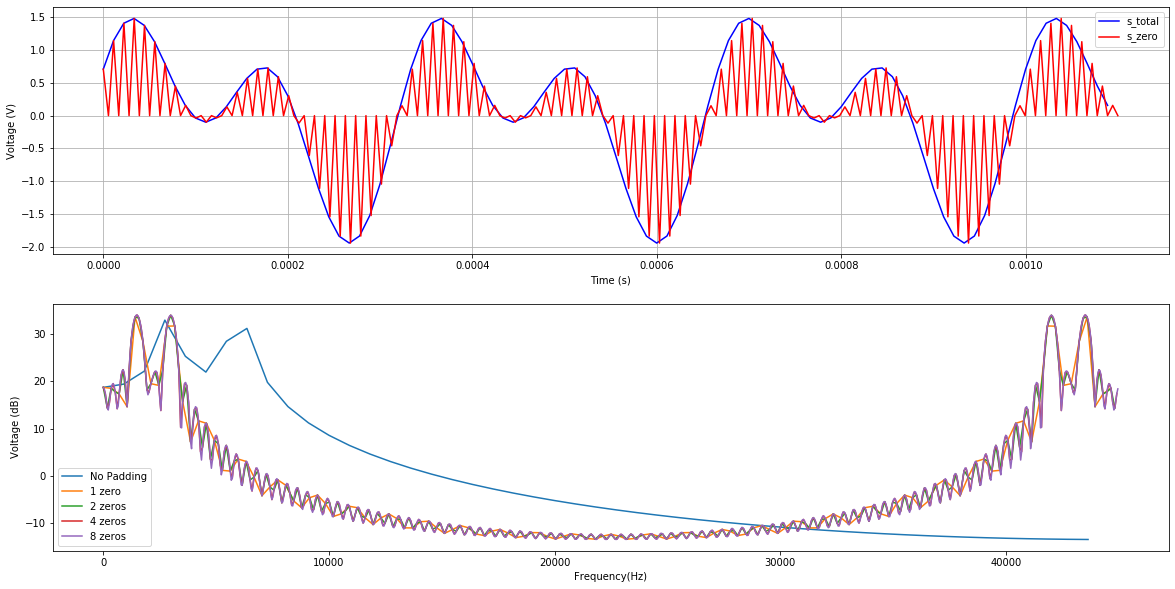

In [8]:
index = list(range(1,len(s_total)+1))
s_zero = np.insert(s_total,index,0)
t_zero = np.linspace(0,duration,len(s_zero))

plt.figure('position', [20,10])
plt.subplot(2,1,1)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)' )
plt.grid()
plt.plot(t, s_total, 'b', label="s_total")
plt.plot(t_zero, s_zero, 'r', label="s_zero")
plt.legend()


# Number of bins
nfft_z1 = int(1*2**(np.ceil(np.log2(len(s_zero)))))
nfft_z2 = int(2*2**(np.ceil(np.log2(len(s_zero)))))
nfft_z4 = int(4*2**(np.ceil(np.log2(len(s_zero)))))
nfft_z8 = int(8*2**(np.ceil(np.log2(len(s_zero)))))


# FFT
S_z1 = fft(s_zero, nfft_z1)
S_z2 = fft(s_zero, nfft_z2)
S_z4 = fft(s_zero, nfft_z4)
S_z8 = fft(s_zero, nfft_z8)


# Sample Frequencies
fft_freq_z1 = fftfreq(nfft_z1, 1/Fs)
fft_freq_z2 = fftfreq(nfft_z2, 1/Fs)
fft_freq_z4 = fftfreq(nfft_z4, 1/Fs)
fft_freq_z8 = fftfreq(nfft_z8, 1/Fs)


plt.subplot(2,1,2)
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(S[0:nfft//2])), label="No Padding")
plt.plot(fft_freq_z1[0:nfft_z1//2], 20*np.log10(abs(S_z1[0:nfft_z1//2])), label="1 zero")
plt.plot(fft_freq_z2[0:nfft_z2//2], 20*np.log10(abs(S_z2[0:nfft_z2//2])), label="2 zeros")
plt.plot(fft_freq_z4[0:nfft_z4//2], 20*np.log10(abs(S_z4[0:nfft_z4//2])), label="4 zeros")
plt.plot(fft_freq_z8[0:nfft_z8//2], 20*np.log10(abs(S_z8[0:nfft_z8//2])), label="8 zeros")


plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()

## Time Domain Windows

A demonstration of how windowing can prevent spectral leakage. The way that this is done is by multiplying a kernel to the signal.

### Window Types
- Hamming
- Bartlett
- Blackman
- Hanning
- Kaiser

Correction Factors
Hamming:  1.5900333642459816
Barlett:  1.7350863874973617
Blackman: 1.816232955700218
Hanning:  1.636895104456011
Kaiser:   3.3660714743222844


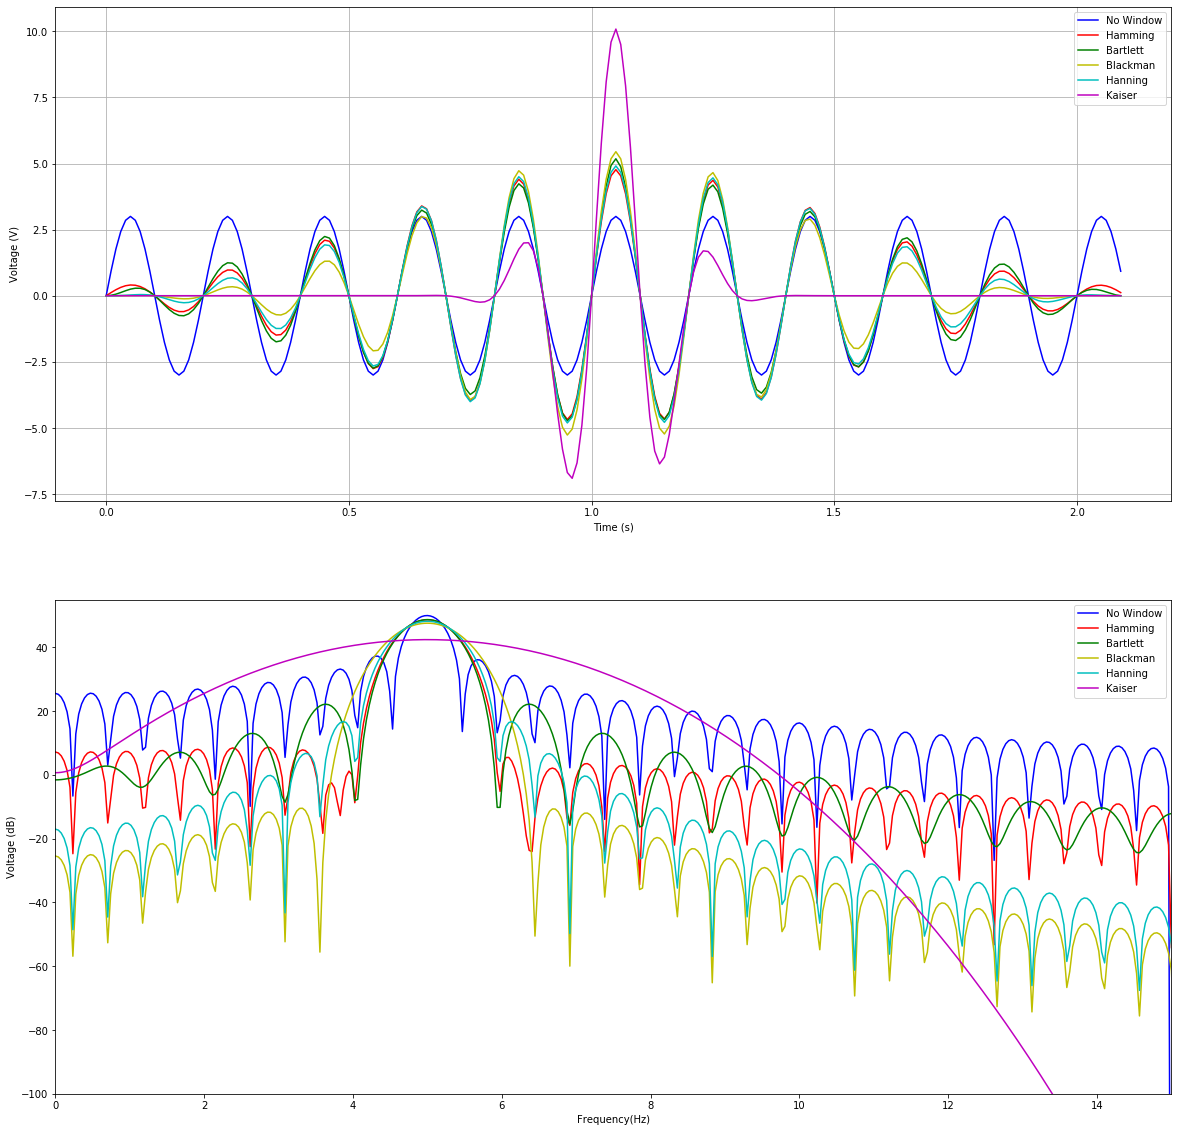

In [9]:
# Signal
freq  = 5
amp   = 3
phase = 0*np.pi/180
duration =  2.1
Fs = 20*freq                   
t  = np.arange(0,duration, 1/Fs)
s = amp*np.sin(2*np.pi*freq*t + phase)


# Signals * Windows
s_hamming  = s*np.hamming(len(s))
s_bartlett = s*np.bartlett(len(s))
s_blackman = s*np.blackman(len(s))
s_hanning  = s*np.hanning(len(s))
s_kaiser   = s*np.kaiser(len(s), beta=100)


# Calculates the normalization correction
hamming_correction  = np.sqrt(np.sum(s**2)/np.sum(s_hamming**2))
barlett_correction  = np.sqrt(np.sum(s**2)/np.sum(s_bartlett**2))
blackman_correction = np.sqrt(np.sum(s**2)/np.sum(s_blackman**2))
hanning_correction  = np.sqrt(np.sum(s**2)/np.sum(s_hanning**2))
kaiser_correction   = np.sqrt(np.sum(s**2)/np.sum(s_kaiser**2))

print("Correction Factors")
print("Hamming:  " + str(hamming_correction))
print("Barlett:  " + str(barlett_correction))
print("Blackman: " + str(blackman_correction))
print("Hanning:  " + str(hanning_correction))
print("Kaiser:   " + str(kaiser_correction))


# Normalizing the signal
s_hamming  = hamming_correction*s_hamming
s_bartlett = barlett_correction*s_bartlett
s_blackman = blackman_correction*s_blackman
s_hanning  = hanning_correction*s_hanning
s_kaiser   = kaiser_correction*s_kaiser


# FFTs
nfft = int(10*2**(np.ceil(np.log2(len(s))))) # Num bins for every signal
s_fft          = fft(s, nfft)
s_fft_ham      = fft(s_hamming,nfft)
s_fft_bartlett = fft(s_bartlett,nfft)
s_fft_blackman = fft(s_blackman,nfft)
s_fft_hanning  = fft(s_hanning ,nfft)
s_fft_kaiser   = fft(s_kaiser  ,nfft)
fft_freq = fftfreq(nfft, 1/Fs)


plt.figure('position', [20,20])

# Time Plot
plt.subplot(2,1,1)
plt.plot(t, s, 'b', label="No Window")
plt.plot(t, s_hamming , 'r', label="Hamming")
plt.plot(t, s_bartlett, 'g', label="Bartlett")
plt.plot(t, s_blackman, 'y', label="Blackman")
plt.plot(t, s_hanning , 'c', label="Hanning")
plt.plot(t, s_kaiser  , 'm', label="Kaiser")

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)' )
plt.grid()
plt.legend()


# Magnitude plot
plt.subplot(2,1,2)
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft[0:nfft//2])), 'b', label="No Window")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft_ham[0:nfft//2])), 'r', label="Hamming")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft_bartlett[0:nfft//2])), 'g', label="Bartlett")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft_blackman[0:nfft//2])), 'y', label="Blackman")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft_hanning[0:nfft//2])), 'c', label="Hanning")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft_kaiser[0:nfft//2])), 'm', label="Kaiser")

plt.xlim(0,3*freq)
plt.ylim(-100,1.1*max(20*np.log10(abs(s_fft[0:nfft//2]))))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()

### The Magnitude Spectra
The magnitude spectra bins are varied for each windowed signal with a random integer function from 4-20 zeros.

nfft          bin count = 3584
nfft_ham      bin count = 5120
nfft_bartlett bin count = 2560
nfft_blackman bin count = 1280
nfft_hanning  bin count = 3584
nfft_kaiser   bin count = 2816


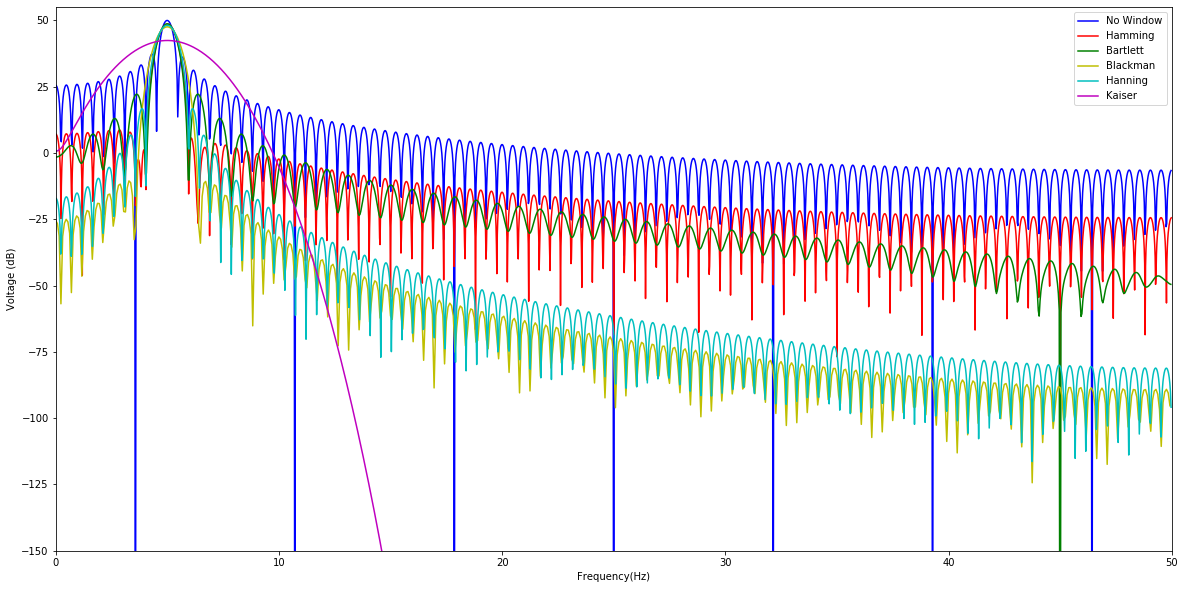

In [10]:
# Bin size adjustement for each windowed signal
nfft          = int(randint(4,20)*2**(np.ceil(np.log2(len(s)))))
nfft_ham      = int(randint(4,20)*2**(np.ceil(np.log2(len(s_hamming)))))
nfft_bartlett = int(randint(4,20)*2**(np.ceil(np.log2(len(s_bartlett)))))
nfft_blackman = int(randint(4,20)*2**(np.ceil(np.log2(len(s_blackman)))))
nfft_hanning  = int(randint(4,20)*2**(np.ceil(np.log2(len(s_hanning)))))
nfft_kaiser   = int(randint(4,20)*2**(np.ceil(np.log2(len(s_kaiser)))))


# FFTs
s_fft          = fft(s, nfft)
s_fft_ham      = fft(s_hamming,nfft_ham)
s_fft_bartlett = fft(s_bartlett,nfft_bartlett)
s_fft_blackman = fft(s_blackman,nfft_blackman)
s_fft_hanning  = fft(s_hanning ,nfft_hanning)
s_fft_kaiser   = fft(s_kaiser  ,nfft_kaiser)


# Retrieving freq bin values
fft_freq          = fftfreq(nfft          , 1/Fs)
fft_freq_ham      = fftfreq(nfft_ham      , 1/Fs)
fft_freq_bartlett = fftfreq(nfft_bartlett , 1/Fs)
fft_freq_blackman = fftfreq(nfft_blackman , 1/Fs)
fft_freq_hanning  = fftfreq(nfft_hanning  , 1/Fs)
fft_freq_kaiser   = fftfreq(nfft_kaiser   , 1/Fs)


# Magnitude plot
plt.figure('position', [20,10])
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s_fft[0:nfft//2])), 'b', label="No Window")
plt.plot(fft_freq_ham[0:nfft_ham//2], 20*np.log10(abs(s_fft_ham[0:nfft_ham//2])), 'r', label="Hamming")
plt.plot(fft_freq_bartlett[0:nfft_bartlett//2], 20*np.log10(abs(s_fft_bartlett[0:nfft_bartlett//2])), 'g', label="Bartlett")
plt.plot(fft_freq_blackman[0:nfft_blackman//2], 20*np.log10(abs(s_fft_blackman[0:nfft_blackman//2])), 'y', label="Blackman")
plt.plot(fft_freq_hanning [0:nfft_hanning//2], 20*np.log10(abs(s_fft_hanning[0:nfft_hanning//2])), 'c', label="Hanning")
plt.plot(fft_freq_kaiser  [0:nfft_kaiser//2], 20*np.log10(abs(s_fft_kaiser[0:nfft_kaiser//2])), 'm', label="Kaiser")

plt.xlim(0,10*freq)
plt.ylim(-150,1.1*max(20*np.log10(abs(s_fft[0:nfft//2]))))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()


# Printing bin size
print("nfft          bin count = " + str(nfft))
print("nfft_ham      bin count = " + str(nfft_ham))
print("nfft_bartlett bin count = " + str(nfft_bartlett))
print("nfft_blackman bin count = " + str(nfft_blackman))
print("nfft_hanning  bin count = " + str(nfft_hanning))
print("nfft_kaiser   bin count = " + str(nfft_kaiser))

### Parseval's Theorem Screening

The total energy in the time-domain must be the same in the frequency-domain. The energy analysis demonstrates Parseval's relation the conservation of energy of the windowed signals. Reference: [Parseval's Theorem in Python](http://ericstrong.org/parsevals-theorem-in-python/)

In [11]:
period = 1/Fs


# Time domain energy calculation
s_energy          = sum(s**2)*period # dt = period
s_hamming_energy  = sum(s_hamming**2)*period
s_bartlett_energy = sum(s_bartlett**2)*period
s_blackman_energy = sum(s_blackman**2)*period
s_hanning_energy  = sum(s_hanning**2)*period
s_kaiser_energy   = sum(s_kaiser**2)*period


# Frequency domain energy calculation
s_fft_energy          = sum((np.abs(s_fft)/nfft)**2)*nfft*period # df=nfft*period
s_fft_hamming_energy  = sum((np.abs(s_fft_ham)/nfft_ham)**2)*nfft_ham*period
s_fft_bartlett_energy = sum((np.abs(s_fft_bartlett)/nfft_bartlett)**2)*nfft_bartlett*period
s_fft_blackman_energy = sum((np.abs(s_fft_blackman)/nfft_blackman)**2)*nfft_blackman*period
s_fft_hanning_energy  = sum((np.abs(s_fft_hanning)/nfft_hanning)**2)*nfft_hanning*period
s_fft_kaiser_energy   = sum((np.abs(s_fft_kaiser)/nfft_kaiser)**2)*nfft_kaiser*period


# Print energy relation proving parseval's theorem between time and frequency domain representations
# and rounding to the 8th decimal place to floating point rounding errors
print("                Energy Analysis                  ")
print("_________________________________________________")
print("| Time Domain  |  Frequency Domain  |   Signal  |")
print("|              |                    |           |")
print("|  "+str('{:.8f}'.format(np.round(s_energy, 8)))         +"  |     " + str('{:.8f}'.format(np.round(s_fft_energy)))         + "     |  s        |")
print("|  "+str('{:.8f}'.format(np.round(s_hamming_energy, 8))) +"  |     " + str('{:.8f}'.format(np.round(s_fft_hamming_energy )))+ "     |  Hamming  |")
print("|  "+str('{:.8f}'.format(np.round(s_bartlett_energy, 8)))+"  |     " + str('{:.8f}'.format(np.round(s_fft_bartlett_energy)))+ "     |  Barlett  |")
print("|  "+str('{:.8f}'.format(np.round(s_blackman_energy, 8)))+"  |     " + str('{:.8f}'.format(np.round(s_fft_blackman_energy)))+ "     |  Blackman |")
print("|  "+str('{:.8f}'.format(np.round(s_hanning_energy, 8))) +"  |     " + str('{:.8f}'.format(np.round(s_fft_hanning_energy))) + "     |  Hanning  |")
print("|  "+str('{:.8f}'.format(np.round(s_kaiser_energy, 8)))  +"  |     " + str('{:.8f}'.format(np.round(s_fft_kaiser_energy)))  + "     |  Kaiser   |")

                Energy Analysis                  
_________________________________________________
| Time Domain  |  Frequency Domain  |   Signal  |
|              |                    |           |
|  9.45000000  |     9.00000000     |  s        |
|  9.45000000  |     9.00000000     |  Hamming  |
|  9.45000000  |     9.00000000     |  Barlett  |
|  9.45000000  |     9.00000000     |  Blackman |
|  9.45000000  |     9.00000000     |  Hanning  |
|  9.45000000  |     9.00000000     |  Kaiser   |


### Finite Impulse Response Filtering

512


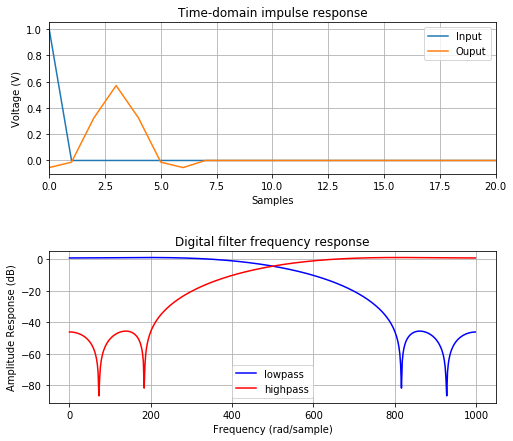

In [12]:
# Filters
b1 = [-0.0540, -0.0129, 0.3240, 0.5707, 0.3240, -0.0129, -0.0540]
b2 = [0.0540, -0.0129, -0.3240, 0.5707, -0.3240, -0.0129, 0.0540]


# Filter Frequency Response
w1, h1 = signal.freqz(b1, fs=2000)
w2, h2 = signal.freqz(b2, fs=2000)
print(len(h1))


#Impulse
impulse = np.arange(0,2000)
impulse = impulse*0
impulse[0] = 1
output = signal.convolve(b1,impulse)


plt.figure('position', [8,7])
plt.subplots_adjust(hspace = .5)

# Time-domain Impulse Response
plt.subplot(2,1,1)
plt.title('Time-domain impulse response')
plt.plot(impulse, label='Input')
plt.plot(output, label='Ouput')
plt.ylabel('Voltage (V)')
plt.xlabel('Samples')
plt.xlim(0,20)
plt.grid()
plt.legend()

# Frequency Response
plt.subplot(2,1,2)
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b', label='lowpass')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r', label='highpass')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.legend()

#### Zero-phase Sinusoidal signal

Results for the first filtered signal has a time delay (phase shift) and the signal has been slightly amplified. The spectrum demonstrates the impact of the FIR filter on the signal input.

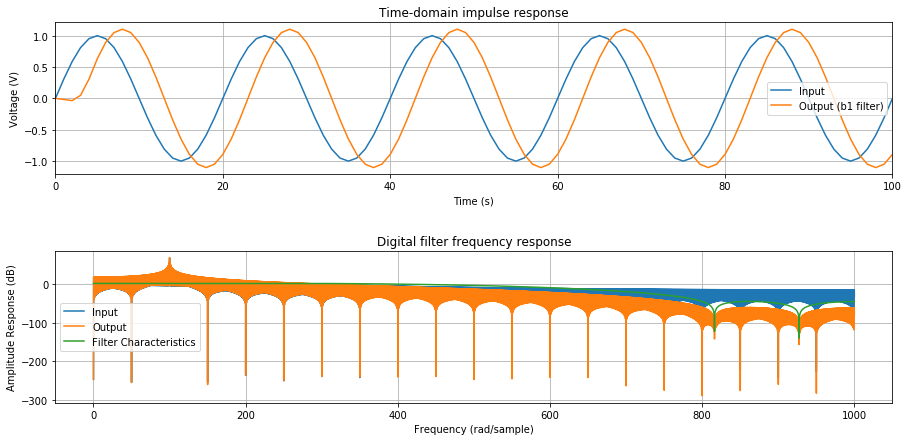

In [13]:
# Signal
freq  = 100
amp   = 1
phase = 0*np.pi/180
duration =  2.1
fs = 2000                  
t  = np.arange(0,duration, 1/fs)
s1 = amp*np.sin(2*np.pi*freq*t + phase)

nfft = int(10*2**(np.ceil(np.log2(len(s1)))))
s1_fft = fft(s1, nfft)
fft_freq = fftfreq(nfft, 1/fs)


# Filter
b1 = [-0.0540, -0.0129, 0.3240, 0.5707, 0.3240, -0.0129, -0.0540]
w1, h1 = signal.freqz(b1, fs=2000, worN=nfft)


# Filtered Signal
s1_filt = signal.convolve(s1,b1)
s1_fft_filt = fft(s1_filt, nfft)


plt.figure('position', [15,7])
plt.subplots_adjust(hspace = .5)

# Time-domain Impulse Response
plt.subplot(2,1,1)
plt.title('Time-domain impulse response')
plt.plot(s1, label='Input')
plt.plot(s1_filt, label='Output (b1 filter)')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.xlim(0, fs*.05)
plt.grid()
plt.legend()


# Frequency Response
plt.subplot(2,1,2)
plt.title('Digital filter frequency response')
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s1_fft[0:nfft//2])), label="Input")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s1_fft_filt[0:nfft//2])), label="Output")
plt.plot(w1, 20*np.log10(np.abs(h1)), label='Filter Characteristics')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.legend()

#### Zero-phase 850Hz Sinusoidal signal

Notice how the filter suppresses the signal as it approaches the low points in the filter characteristics' FFT.

NameError: name 'b' is not defined

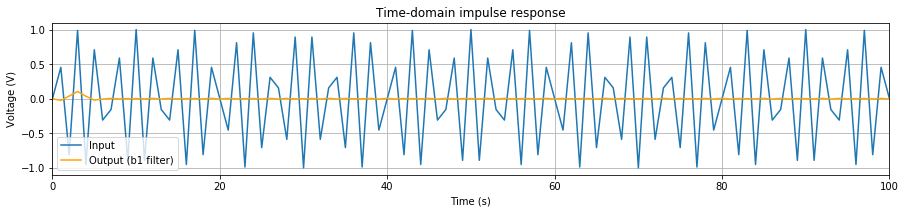

In [14]:
# Signal
freq  = 850
amp   = 1
phase = 0*np.pi/180
duration =  2.1
fs = 2000                  
t  = np.arange(0,duration, 1/fs)
s1 = amp*np.sin(2*np.pi*freq*t + phase)

nfft = int(10*2**(np.ceil(np.log2(len(s1)))))
s1_fft = fft(s1, nfft)
fft_freq = fftfreq(nfft, 1/fs)


# Filter
b1 = [-0.0540, -0.0129, 0.3240, 0.5707, 0.3240, -0.0129, -0.0540]
w1, h1 = signal.freqz(b1, fs=2000, worN=nfft)


# Filtered Signal
s1_filt = signal.convolve(s1,b1)
s1_fft_filt = fft(s1_filt, nfft)


plt.figure('position', [15,7])
plt.subplots_adjust(hspace = .5)

# Time-domain Impulse Response
plt.subplot(2,1,1)
plt.title('Time-domain impulse response')
plt.plot(s1, label='Input')
plt.plot(s1_filt, label='Output (b1 filter)', color='orange')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.xlim(0,100)
plt.grid()
plt.legend()
b

# Frequency Response
plt.subplot(2,1,2)
plt.title('Digital filter frequency response')
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s1_fft[0:nfft//2])), label="Input")
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(s1_fft_filt[0:nfft//2])), label="Output")
plt.plot(w1, 20*np.log10(np.abs(h1)), label='Filter Characteristics')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.legend()

### Filter Design
Design a simple filter with poles and zeroes using a qualitative approach with the unit circle in the z-plane.

    Passband: 300-600Hz
    Stopbands: 0-200Hz and 700-1000Hz.
    Sampling frequency (Fs): 2000Hz
    Poles/Zeros: 1 pole, 3 zeroes
    


1. Diagram the poles and zeroes on the unit circle, with complex coordinates.  You can do this by hand and scan it, but be sure your writing is clear and complete.  Choose the pole and zero locations carefully.


2. Plot the desired and actual frequency response (magnitude) on the same set of axes.  You can do this by hand and scan it, but be sure your writing is clear and complete.  Use the "qualitative" approach where you estimate spectral magnitude based on distance between poles, zeroes, and the observer on the unit circle.


3. Reduce the transfer function of the filter algebraically until you have it in "canonical form" .. meaning a sum of coefficients multiplied by z or z^-i in the numerator, and a sum of coefficients multiplied by z or z^-i in the denominator.  You should have a polynomial in the numerator with only a few z-terms, and a denominator with a single z-term.

4. In a Jupyter notebook, plot the frequency response of the numerator (the FIR filter part) using the coefficients you derived in step 3, which should be the same as the impulse response.  How does it compare to your hand-drawn version?

5. Put the same filter design characteristics (passband/stopband, or zeroes only .. no pole) into the online FIR filter design portal (http://t-filter.engineerjs.com/) and create versions of the filter using (a) 7, (b) 17, and (c) unlimited/minimum coefficients.  Plot the magnitude response on the same set of axes in a Jupyter notebook.  How does this compare to your hand-drawn version?